In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#creating a dataframe with the data and looking at the first 5 rows
df = pd.read_csv('data2/telco_churn.csv')
df.head(5)

#looking at shape of dataset it is 100,000 rows by 100 columns
df.shape

#describing the dataset 
df.describe()

#type of data in each column 
df.info()

#dropping Customer ID as it will not determine the probability of a customer churning
df.drop('Customer_ID', axis = 1, inplace = True)
df.info()


#seperating into 3 groups: float, int and object for visualization
df_categorical = [col for col in df.columns if df[col].dtype == 'object']
df_integer = [col for col in df.columns if df[col].dtype == 'int64']
df_float = [col for col in df.columns if df[col].dtype == 'float64']  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [2]:
# Checking for null entries
print(df.isnull().sum())

#columns with missing values 
null_val = df.isnull().sum().sort_values(ascending = False).head(11)
percent = (null_val/len(df))*100




# Percentage of missing values
pd.DataFrame({'Number of missing values': null_val, 'Percentage of missing data': percent})


rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid6_10        1732
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Length: 99, dtype: int64


,Number of missing values,Percentage of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


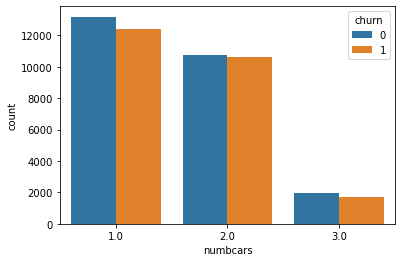

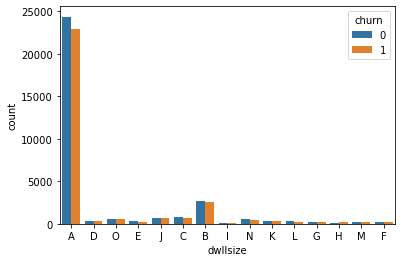

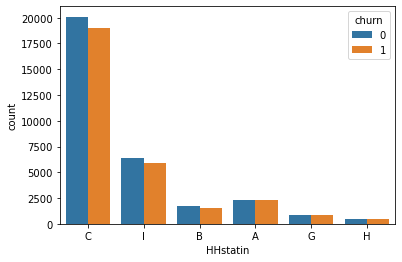

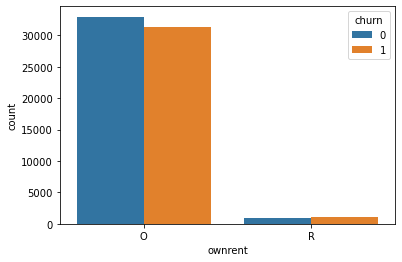

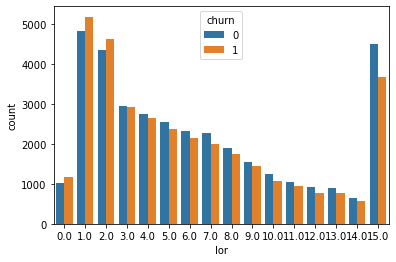

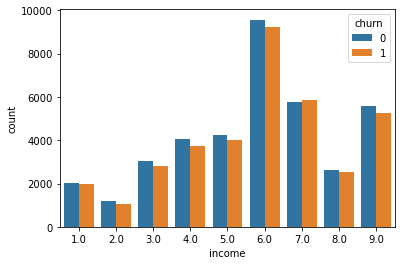

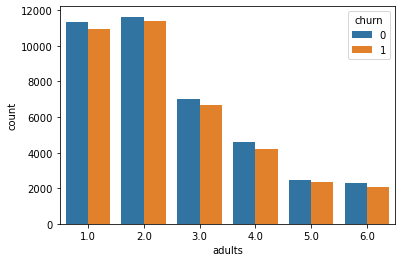

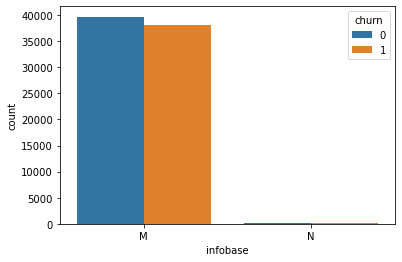

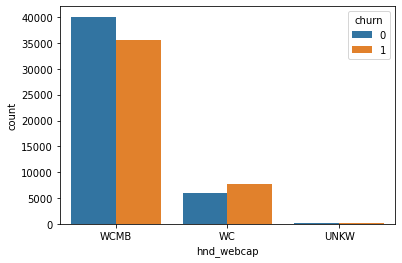

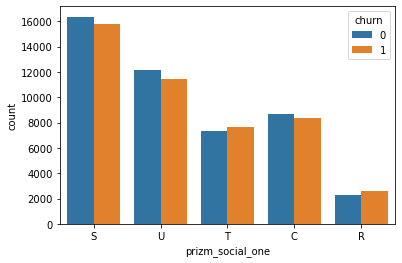

churn,0,1
prizm_social_one,,
C,0.509226,0.490774
R,0.472932,0.527068
S,0.509238,0.490762
T,0.491627,0.508373
U,0.515182,0.484818


In [3]:
#visualizing the features with the most missing values against the churn 
sns.countplot(x= "numbcars", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('numbcars')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "dwllsize", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwllsize')["churn"].value_counts(normalize=True).unstack(fill_value=0)


sns.countplot(x= "HHstatin", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('HHstatin')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "ownrent", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ownrent')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "lor", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('lor')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "income", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('income')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "adults", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('adults')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "infobase", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('infobase')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "hnd_webcap", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('hnd_webcap')["churn"].value_counts(normalize=True).unstack(fill_value=0)

sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)


<function matplotlib.pyplot.show(close=None, block=None)>

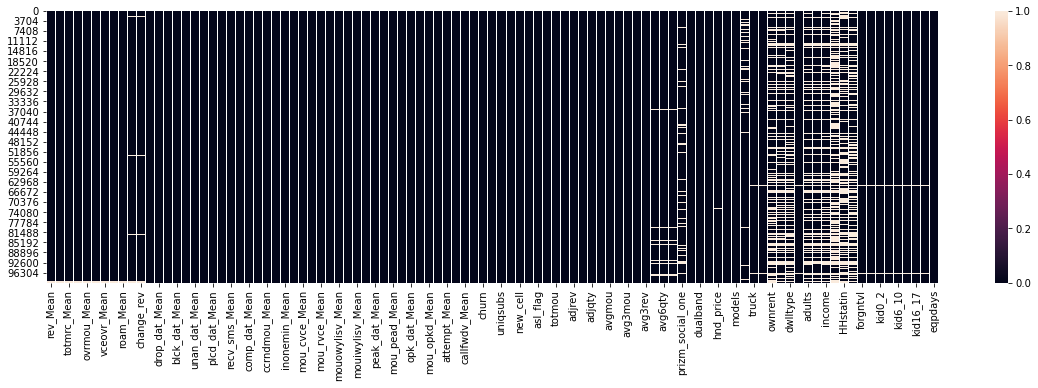

In [4]:
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull())
plt.show

In [5]:
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor',
         'income','adults','infobase','prizm_social_one',],axis=1,inplace=True)

In [6]:
df.shape

(100000, 89)

<ipython-input-7-e955d7b681fe>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6, 3, i + 1)


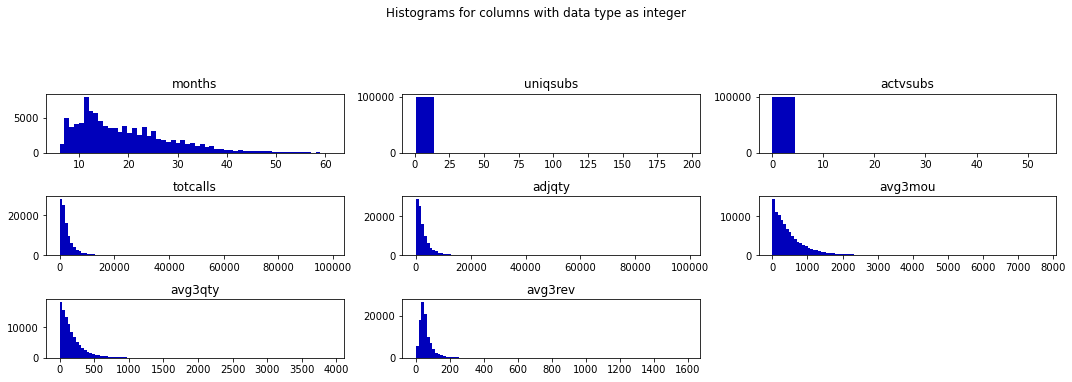

In [7]:
#plotting integer values into a histogram
int_hist = df[['months', 'uniqsubs','actvsubs','totcalls','adjqty','avg3mou','avg3qty','avg3rev']]

fig1 = plt.figure(1, figsize=(15, 10))
plt.suptitle('Histograms for columns with data type as integer\n')

for i in range(int_hist.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(int_hist.columns.values[i])
    vals = np.size(int_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(int_hist.iloc[:, i], bins=vals, color = '#0000BB')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  

fig1 = plt.figure(1, figsize=(15, 10))
plt.suptitle('Histograms for columns with data type as integer\n')

for i in range(int_hist.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(int_hist.columns.values[i])
    vals = np.size(int_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(int_hist.iloc[:, i], bins=vals, color = '#0000BB')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])



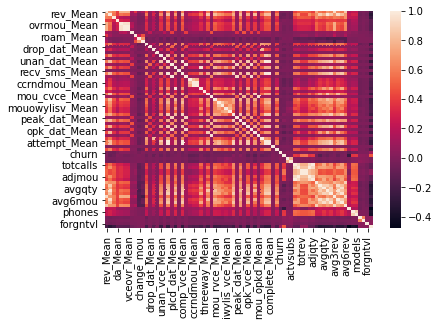

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,forgntvl,eqpdays
rev_Mean,1.000000,0.706029,0.602148,0.403806,0.772117,0.776647,0.772159,0.152664,0.374718,0.075835,...,0.630410,0.578217,0.857309,0.167376,0.228117,0.225320,-0.035863,-0.010322,-0.038434,-0.213402
mou_Mean,0.706029,1.000000,0.575567,0.394583,0.575611,0.541250,0.539811,0.090349,0.125442,-0.008211,...,0.945447,0.827084,0.693763,0.231482,0.291907,0.286538,-0.054795,-0.027519,-0.051355,-0.315322
totmrc_Mean,0.602148,0.575567,1.000000,0.306966,0.200732,0.164401,0.163038,0.035428,0.046865,-0.020845,...,0.579936,0.521678,0.667410,0.223978,0.223322,0.219285,-0.035703,-0.016609,-0.034726,-0.247781
da_Mean,0.403806,0.394583,0.306966,1.000000,0.304596,0.274344,0.274162,0.040290,0.044899,-0.021603,...,0.377133,0.385849,0.413717,0.090724,0.168919,0.160514,-0.032306,-0.007566,-0.021007,-0.120649
ovrmou_Mean,0.772117,0.575611,0.200732,0.304596,1.000000,0.956056,0.953231,0.162933,0.040371,-0.011172,...,0.494148,0.459078,0.650337,0.084445,0.141164,0.140901,-0.024408,-0.003892,-0.026663,-0.127763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
models,0.225320,0.286538,0.219285,0.160514,0.140901,0.118493,0.116821,0.032690,0.015333,-0.004918,...,0.300495,0.361271,0.259510,0.171457,0.890311,1.000000,0.001789,0.007732,-0.010085,-0.380732
truck,-0.035863,-0.054795,-0.035703,-0.032306,-0.024408,-0.029851,-0.029295,-0.009344,0.003401,0.006847,...,-0.058710,-0.035808,-0.043558,-0.052827,0.000659,0.001789,1.000000,0.621854,0.040533,0.043237
rv,-0.010322,-0.027519,-0.016609,-0.007566,-0.003892,-0.007631,-0.007452,-0.002641,0.003532,0.006981,...,-0.032048,-0.019083,-0.015709,-0.013078,0.003030,0.007732,0.621854,1.000000,0.046756,0.030765
forgntvl,-0.038434,-0.051355,-0.034726,-0.021007,-0.026663,-0.028010,-0.028211,-0.001937,-0.005337,0.005273,...,-0.055745,-0.055713,-0.044588,-0.017874,-0.009672,-0.010085,0.040533,0.046756,1.000000,0.046153


In [8]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

df.corr()

In [9]:
df.groupby('churn').agg(['mean', 'median', 'std', 'var'])

rev_Mean                                      mou_Mean          \
            mean    median        std          var        mean  median   
churn                                                                    
0      59.218692  48.87625  44.367982  1968.517822  543.206895  380.50   
1      58.211074  47.49000  48.170736  2320.419828  483.306417  329.75   

                                 totmrc_Mean           ...        rv  \
              std            var        mean   median  ...       std   
churn                                                  ...             
0      540.310876  291935.842315   47.782378  44.9900  ...  0.275047   
1      507.474688  257530.559004   44.543091  43.4175  ...  0.275455   

                 forgntvl                                eqpdays         \
            var      mean median       std       var        mean median   
churn                                                                     
0      0.075651  0.059130    0.0  0.235870  0.055635  363.280925  310.0   
1      0.075876  0.056799    0.0  0.231461  0.053574  421.089524  366.0   

                                 
              std           var  
churn                            
0      249.986138  62493.069327  
1      259.705607  67447.002155  

[2 rows x 292 columns]

In [10]:
df.cov()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,forgntvl,eqpdays
rev_Mean,2142.919379,17164.198625,658.492043,40.705961,3477.615607,1096.577355,1074.340656,22.095477,255.187970,968.603799,...,14499.004434,4891.531911,1615.292396,471.384326,13.870983,9.369828,-0.648558,-0.131344,-0.414900,-2525.342756
mou_Mean,17164.198625,275801.575576,7140.663425,451.251978,29411.887586,8669.794917,8520.646699,148.348993,969.155556,-1190.829281,...,245880.098627,79117.941671,14780.735037,7391.399391,201.366523,135.178529,-11.240805,-3.972203,-6.288766,-42332.197421
totmrc_Mean,658.492043,7140.663425,558.069245,15.791244,461.376460,118.456992,115.762143,2.616720,16.287250,-135.771722,...,6791.169595,2247.018641,640.259211,321.960787,6.929704,4.653454,-0.329349,-0.107807,-0.191220,-1496.321538
da_Mean,40.705961,451.251978,15.791244,4.742025,64.536009,18.221758,17.944067,0.274313,1.438387,-12.990687,...,406.574370,153.003605,36.538198,11.963961,0.483178,0.313995,-0.027473,-0.004527,-0.010664,-67.162293
ovrmou_Mean,3477.615607,29411.887586,461.376460,64.536009,9466.540858,2837.208803,2787.572060,49.564009,57.785142,-300.091551,...,23781.968154,8126.741295,2564.056497,500.316262,18.041206,12.315132,-0.925982,-0.103884,-0.603816,-3177.755542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
models,9.369828,135.178529,4.653454,0.313995,12.315132,3.246636,3.154138,0.091815,0.202633,-1.220242,...,135.180198,59.791991,9.580504,9.339638,1.050986,0.807114,0.000629,0.001913,-0.002118,-87.729128
truck,-0.648558,-11.240805,-0.329349,-0.027473,-0.925982,-0.355632,-0.343825,-0.011520,0.019721,0.738534,...,-11.402230,-2.558870,-0.692629,-1.260536,0.000339,0.000629,0.153169,0.066988,0.003707,4.341794
rv,-0.131344,-3.972203,-0.107807,-0.004527,-0.103884,-0.063972,-0.061545,-0.002291,0.014411,0.529935,...,-4.385961,-0.960928,-0.176024,-0.219422,0.001096,0.001913,0.066988,0.075762,0.003008,2.172758
forgntvl,-0.414900,-6.288766,-0.191220,-0.010664,-0.603816,-0.199196,-0.197649,-0.001425,-0.018472,0.339291,...,-6.483001,-2.384029,-0.424561,-0.254687,-0.002970,-0.002118,0.003707,0.003008,0.054614,2.767454


['attempt_Mean', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'avgmou', 'avgqty', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'churn', 'comp_vce_Mean', 'complete_Mean', 'custcare_Mean', 'eqpdays', 'hnd_price', 'inonemin_Mean', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_vce_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_vce_Mean', 'phones', 'plcd_vce_Mean', 'recv_vce_Mean', 'threeway_Mean', 'totmrc_Mean', 'unan_vce_Mean', 'uniqsubs', 'vceovr_Mean']


<AxesSubplot:>

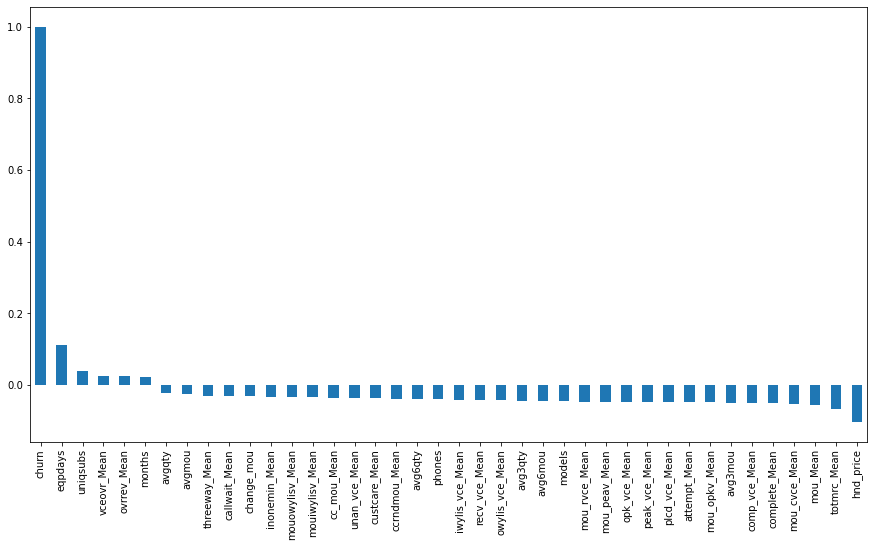

In [11]:
# Get Correlation of "churn" with other variables:
c = df.corr()['churn'].abs()
sc = c.sort_values()
sc
a = dict(sc.tail(40))
b = a.keys()
print(sorted(b))
plt.figure(figsize=(15,8))
df[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [12]:
# Import the formula tools
import statsmodels.formula.api as smf

# Create the linear regression model object ("ols" stands for ordinary least squares)
model = smf.ols(data=df, formula = 'churn ~ rev_Mean')

# Create a RegressionResults object
result = model.fit()

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.80
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           0.000592
Time:                        18:50:03   Log-Likelihood:                -72309.
No. Observations:               99643   AIC:                         1.446e+05
Df Residuals:                   99641   BIC:                         1.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5018      0.003    196.164      0.000       0.497       0.507
rev_Mean      -0.0001   3.42e-05     -3.435      0.001      -0.000   -5.05e-05
==============================================================================
Omnibus:                   339799.159   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16598.712
Skew:                           0.020   Prob(JB):                         0.00
Kurtosis:                       1.001   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
telchurn = pd.read_csv("data2/telco_churn.csv")
telchurn_reg = smf.ols("churn ~ rev_Mean + change_mou + change_rev", data=df).fit()  # Here we create and fit our model on the same line
telchurn_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     90.42
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           1.97e-58
Time:                        18:50:05   Log-Likelihood:                -71788.
No. Observations:               99109   AIC:                         1.436e+05
Df Residuals:                   99105   BIC:                         1.436e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5008      0.003    193.607      0.000       0.496       0.506
rev_Mean      -0.0001   3.47e-05     -4.294      0.000      -0.000    -8.1e-05
change_mou    -0.0001   7.78e-06    -15.850      0.000      -0.000      -0.000
change_rev     0.0006    4.3e-05     12.877      0.000       0.000       0.001
==============================================================================
Omnibus:                   339981.642   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16343.342
Skew:                           0.027   Prob(JB):                         0.00
Kurtosis:                       1.011   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:title={'center':'Scatterplot for churn vs rev change'}, xlabel='churn', ylabel='mou_Mean'>

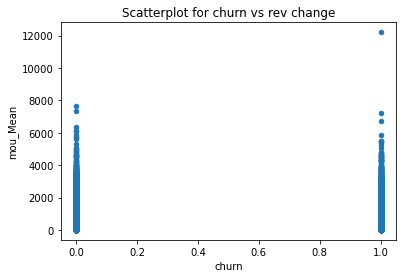

In [15]:
df.plot.scatter(x='churn', y='mou_Mean', title='Scatterplot for churn vs rev change')

<AxesSubplot:title={'center':'Scatterplot for churn vs rev mean'}, xlabel='churn', ylabel='rev_Mean'>

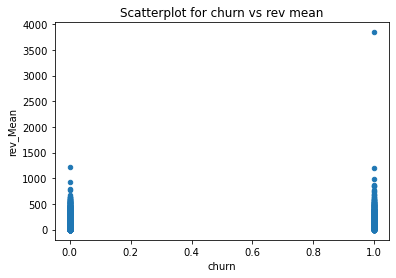

In [16]:
df.plot.scatter(x='churn', y='rev_Mean', title='Scatterplot for churn vs rev mean')

In [17]:
import pandas as pd
import numpy as np
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt



In [18]:
df = pd.read_csv('data2/telco_churn.csv')
df.head()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [19]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [20]:
#Sample Size as 1% of the data 
sampledata = df.sample(n=100);
sampledata

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
19961,6.5000,1.50,5.00,0.00,1.50,1.5000,1.5000,0.0,0.0000,-1.50,...,0.0,S,U,U,U,U,U,Y,850.0,1019962
40765,31.2225,73.00,29.99,0.00,2.75,0.9625,0.9625,0.0,0.0000,118.00,...,0.0,U,U,U,U,U,U,Y,259.0,1040766
92173,53.9900,831.50,44.99,0.00,37.50,15.0000,15.0000,0.0,0.0000,32.50,...,0.0,U,U,U,U,U,U,N,194.0,1092174
80855,53.9050,358.50,47.49,0.99,50.25,17.5875,17.5875,0.0,0.0000,-77.50,...,0.0,S,U,Y,Y,U,U,Y,207.0,1080856
8008,40.6975,480.75,35.99,2.97,0.00,0.0000,0.0000,0.0,0.4875,-74.75,...,0.0,U,Y,U,U,U,U,Y,251.0,1008009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29522,30.0000,0.75,30.00,0.00,0.00,0.0000,0.0000,0.0,0.0000,-0.75,...,0.0,N,U,U,Y,Y,U,Y,744.0,1029523
94125,56.3900,1236.75,59.99,0.00,16.00,6.4000,6.4000,0.0,0.0000,118.25,...,0.0,G,U,U,U,U,U,N,273.0,1094126
89455,49.9900,286.25,49.99,0.00,0.00,0.0000,0.0000,0.0,0.0000,71.75,...,0.0,N,U,U,U,U,U,Y,221.0,1089456
38242,47.4900,490.25,59.99,0.00,0.00,0.0000,0.0000,0.0,0.0000,-37.25,...,0.0,N,U,U,U,U,U,Y,390.0,1038243


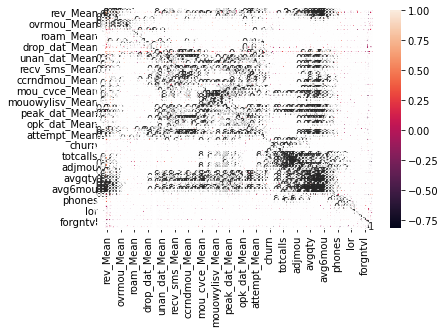

In [21]:
heatmap(sampledata.corr(), annot=True);

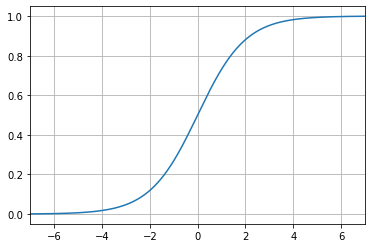

In [22]:
x = np.arange(-7, 7, 0.01)
plt.plot(x, special.expit(x))
plt.grid()
plt.xlim(-7, 7);

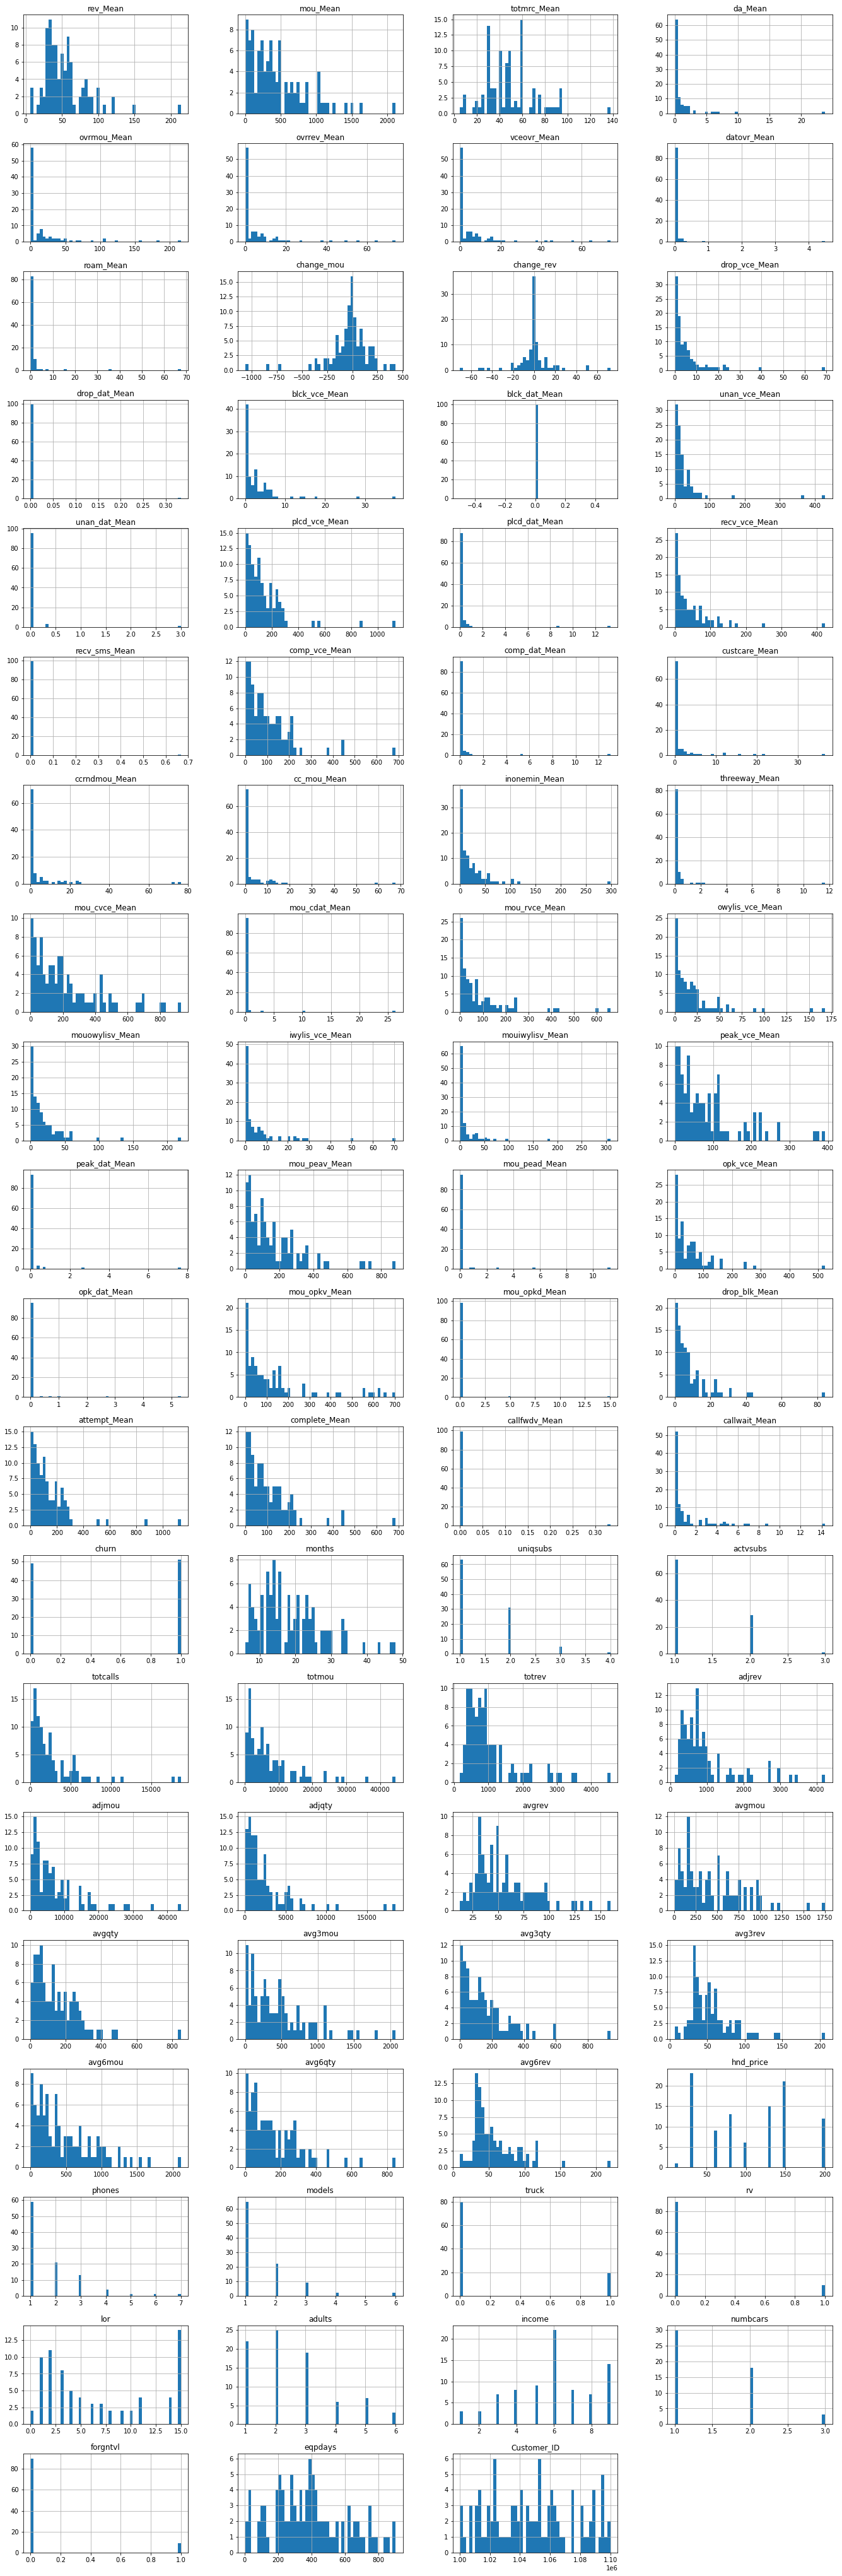

In [23]:
sampledata.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4));

In [24]:
def detect_outliers(sampledata,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(sampledata[c],25)
        # 3rd quartile
        Q3 = np.percentile(sampledata[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = sampledata[(sampledata[c] < Q1 - outlier_step) | (sampledata[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [25]:
# drop outliers
sampledata = sampledata.drop(detect_outliers(sampledata,['uniqsubs', 'actvsubs']),axis = 0).reset_index(drop = True)

<AxesSubplot:>

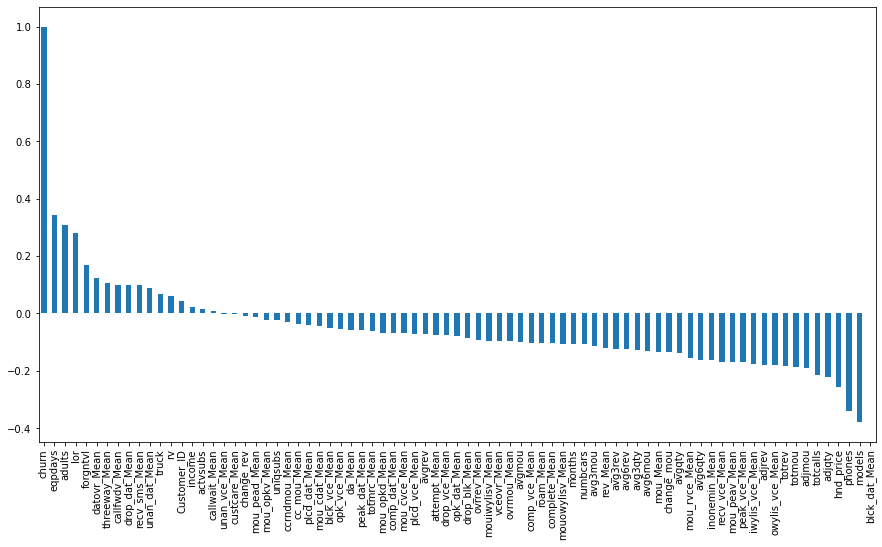

In [26]:
plt.figure(figsize=(15,8))
sampledata.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [27]:
sampledata.columns.values

array(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
       'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean',
       'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean',
       'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean',
       'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean',
       'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean',
       'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean',
       'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean',
       'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean',
       'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean',
       'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean',
       'callwait_Mean', 'churn', 'months', 'uniqsubs', 'actvsubs',
       'new_cell', 'crclscod', 'asl_flag', 'totcalls', 'totmou', 'totrev',
       '

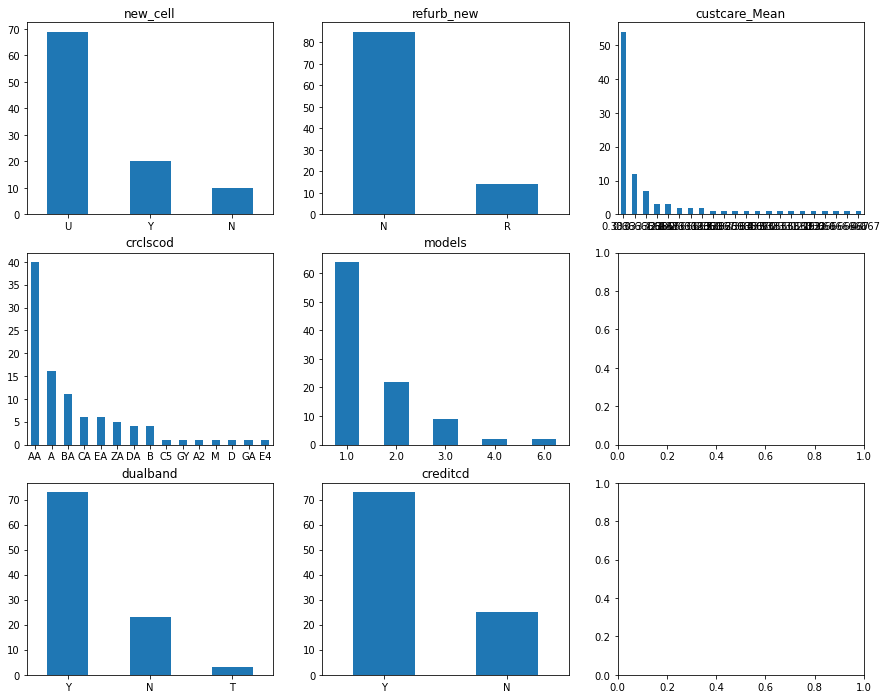

In [28]:
services = ['new_cell','crclscod','dualband','refurb_new',
           'models','creditcd','custcare_Mean']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = sampledata[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = sampledata[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = sampledata[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

<AxesSubplot:xlabel='avgrev', ylabel='avgqty'>

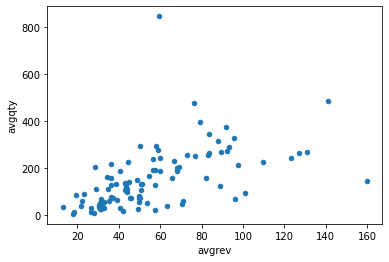

In [29]:
sampledata[['avgrev', 'avgqty']].plot.scatter(x = 'avgrev',
                                                              y='avgqty')

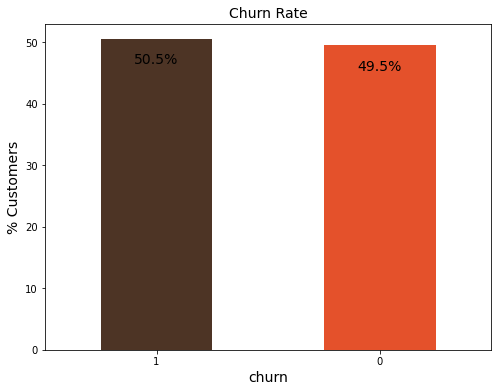

In [30]:
colors = ['#4D3425','#E4512B']
ax = (sampledata['churn'].value_counts()*100.0 /len(sampledata)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,size = 14)

In [31]:
conda install lightgbm


Solving environment: done

## Package Plan ##

  environment location: /Users/anushreejoshi/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py38hecd8cb5_0         884 KB
    ------------------------------------------------------------
                                           Total:         884 KB

The following packages will be UPDATED:

  conda                               4.12.0-py38hecd8cb5_0 --> 22.9.0-py38hecd8cb5_0



conda-22.9.0         | 884 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [33]:
# dependent and independent variables were determined.
X = sampledata.drop('churn', axis=1)
y = sampledata['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


X_train 79
X_test 20
y_train 79
y_test 20


In [59]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)




#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
      
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)        
    print_scores(alg, y_test, y_pred)
    
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    
    return model
